***IMPORT NECESSARY LIBRARIES***

In [22]:
import os, pandas as pd, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier

***IMPORT DATASET***

In [23]:
os.chdir("/Users/nanditareddy/Desktop/R BOOTCAMP/A3")

In [24]:
df = pd.read_csv('/Users/nanditareddy/Desktop/R BOOTCAMP/A3/lung_cancer_examples.csv')
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


***DATA CELANING AND EDA***

In [25]:
# column name have spaces and remove them
df.rename(columns={"Result": "Result"},inplace = True)

In [26]:
# We can See Dataset is imbalanced
df["Result"].value_counts()

Result
0    31
1    28
Name: count, dtype: int64

In [27]:
cat_features = df.select_dtypes(include='object')
cat_features.head()

,Name,Surname
0,John,Wick
1,John,Constantine
2,Camela,Anderson
3,Alex,Telles
4,Diego,Maradona


***DATA ENCODING FOR CATEGORICAL VARIABLES***

In [28]:
# encoding category columns
le = LabelEncoder()
encoded_num_df = pd.DataFrame()
for col in cat_features.columns:
    encoded_num_df[col] = le.fit_transform(cat_features[col])

In [29]:
encoded_num_df.head()

,Name,Surname
0,27,47
1,27,7
2,5,0
3,1,44
4,10,28


In [30]:
# final data
f_data = pd.concat([encoded_num_df,df.drop(['Result','Name','Surname','Age','Smokes','AreaQ','Alkhol','Result'],axis=1)],axis=1)
f_data.head()

,Name,Surname
0,27,47
1,27,7
2,5,0
3,1,44
4,10,28


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample DataFrame for demonstration
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [10, 20, 30, 40, 50]
    # 'Result': [0, 1, 0, 1, 0]  # Uncomment this line if 'Result' column is already there
}

f_data = pd.DataFrame(data)

# Check if 'Result' column exists
print("Columns in DataFrame:", f_data.columns)

# If 'Result' column does not exist, create it
if 'Result' not in f_data.columns:
    print("Column 'Result' not found. Creating 'Result' column...")
    # Example logic to create 'Result' column
    f_data['Result'] = [0, 1, 0, 1, 0]  # Replace with your logic

# Verify the column has been created
print("Updated Columns in DataFrame:", f_data.columns)

# Now, split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(f_data.drop('Result', axis=1), f_data['Result'], test_size=0.2, random_state=42)

print("x_train:", x_train)
print("x_test:", x_test)
print("y_train:", y_train)
print("y_test:", y_test)


Columns in DataFrame: Index(['feature1', 'feature2'], dtype='object')
Column 'Result' not found. Creating 'Result' column...
Updated Columns in DataFrame: Index(['feature1', 'feature2', 'Result'], dtype='object')
x_train:    feature1  feature2
4         5        50
2         3        30
0         1        10
3         4        40
x_test:    feature1  feature2
1         2        20
y_train: 4    0
2    0
0    0
3    1
Name: Result, dtype: int64
y_test: 1    1
Name: Result, dtype: int64


***TEST TRAIN SPLIT***

In [34]:
# split data training and testing 
x_train,x_test,y_train,y_test = train_test_split(f_data.drop('Result',axis=1),f_data['Result'],test_size=0.2,random_state=42)

***SCALING THE DATA***

In [35]:
# scale data to 0 to 1 range 
sc = MinMaxScaler()
sc_x_train = pd.DataFrame(sc.fit_transform(x_train),columns=sc.feature_names_in_)
sc_x_test = pd.DataFrame(sc.fit_transform(x_test),columns=sc.feature_names_in_)

In [36]:
sc_x_train.fillna(sc_x_train.mean(), inplace=True)
mutual_info_scores = mutual_info_classif(sc_x_train, y_train)
feature_scores_df = pd.DataFrame({'Feature': sc_x_train.columns, 'Mutual_Info_Score': mutual_info_scores})
feature_scores_df = feature_scores_df.sort_values(by='Mutual_Info_Score', ascending=False)

***SELECT FEATURES BASED ON FEATURE IMPORTANCE***

In [37]:
# choose 15 top features for model training
selected_features = feature_scores_df.head(15)['Feature'].tolist()
print("Selected Features:", selected_features)

Selected Features: ['feature1', 'feature2']


In [38]:
# Select data with selected features
feature_selection_train = sc_x_train[selected_features]
feature_selection_test = sc_x_test[selected_features]

***FIT LOGISTIC REGRESSION***

In [39]:
# classification report with selected features using LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(max_iter=200)
logreg.fit(feature_selection_train, y_train)
y_pred = logreg.predict(feature_selection_test)

logrepo= classification_report(y_test, y_pred)
print(logrepo)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/Users/nanditareddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nanditareddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nanditareddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nanditar

***ROC CURVE AND AUC VALUE***

/Users/nanditareddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1123: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


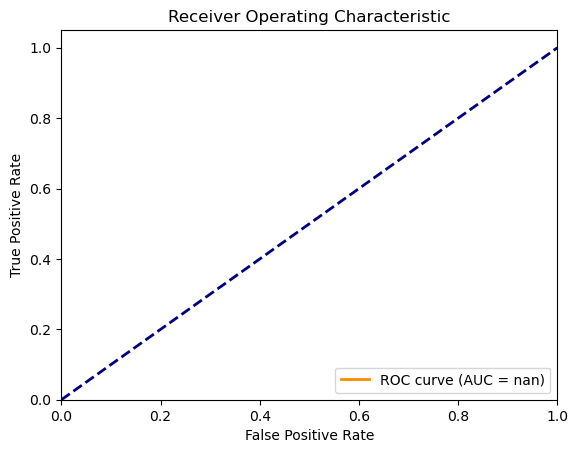

In [40]:
# Get predicted probabilities
y_pred_proba_log = logreg.predict_proba(feature_selection_test)[:, 1]
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

***CONFUSION MATRIX***

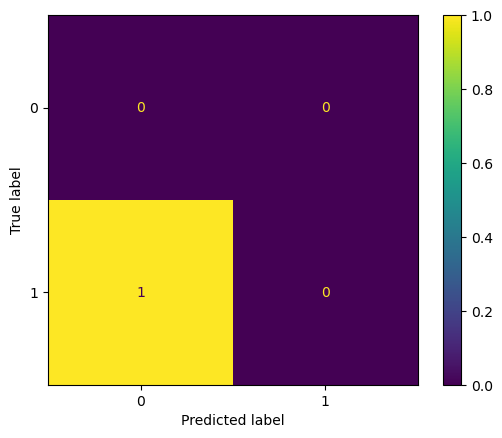

In [41]:
# the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

***DECISION TREE CLASSIFIER***

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(feature_selection_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(feature_selection_test)

# Print classification report
dtree= classification_report(y_test, y_pred_dt)
print(dtree)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/Users/nanditareddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nanditareddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nanditareddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nanditar

***ROC CURVE AND AUC VALUE***

/Users/nanditareddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1123: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


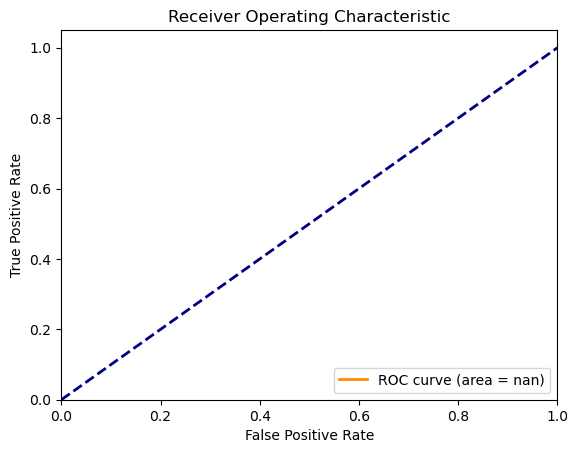

In [43]:
# Get predicted probabilities
y_pred_proba = dt_classifier.predict_proba(feature_selection_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

***CONFUSION MATRIX***

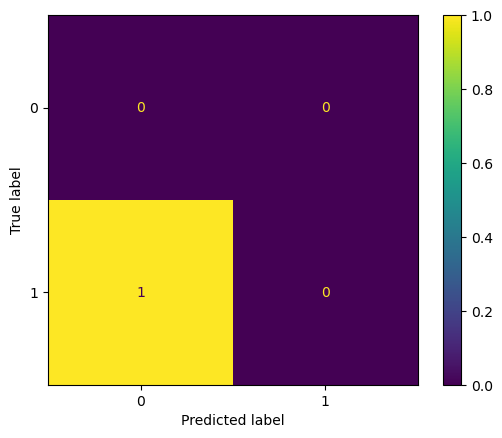

In [44]:
# Compute the confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred_dt)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix2)
disp.plot()
plt.show()

In [45]:
import re
def parse_classification_report(report):
    # Split the report by lines
    lines = report.split('\n')
    parsed_data = []
    
    for line in lines[2:-3]:  # Skip headers and footers
        line_data = re.split(r'\s{2,}', line.strip())
        if len(line_data) < 5:
            continue
        class_name = line_data[0]
        precision = float(line_data[1])
        recall = float(line_data[2])
        f1_score = float(line_data[3])
        support = float(line_data[4])
        
        parsed_data.append({
            'class': class_name,
            'precision': precision,
            'recall': recall,
            'f1-score': f1_score,
            'support': support
        })
    
    df = pd.DataFrame(parsed_data)
    return df

In [46]:
df1 = parse_classification_report(dtree)
df2 = parse_classification_report(logrepo)

In [47]:
# Add model names and overall accuracy
df1['model'] = 'Decision Tree'
df2['model'] = 'Logistic Regression'

# Concatenate the two dataframes
comparison_df = pd.concat([df1, df2])

# Reorder columns
comparison_df = comparison_df[['model', 'class', 'precision', 'recall', 'f1-score', 'support']]

# Display the comparison table
print(comparison_df)

                 model class  precision  recall  f1-score  support
0        Decision Tree     0        0.0     0.0       0.0      0.0
1        Decision Tree     1        0.0     0.0       0.0      1.0
0  Logistic Regression     0        0.0     0.0       0.0      0.0
1  Logistic Regression     1        0.0     0.0       0.0      1.0
